**Google Drive mount**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import library**

In [2]:
import pandas as pd # for data set read
import numpy as np  # for math opration 

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Data set/energy_efficiency_data.csv') # read data set by using read csv function
df.head(5) # show 5 row of data set

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**Analyze the correlations between all the variables in df ?**



In [4]:
#Correlation between all the columns of DataFrame.
df2=df.corr()
print(df2)

                           Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing_Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing_Area_Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating_Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling_Load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof_Area  Overall_Height   Orientation  \
Relative_Compactness      -8.688234e-01    8.277473e-01  

**Which explanatory variables are most correlated to the two target variables ?**

In [5]:
corr=df['Heating_Load'].corr(df['Cooling_Load']) # here our target variable is heating and cooling value so i find corelation b/w in these two column
print(corr)

0.9758618134328573


**Import library for plot graph of corelation**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

**Plot Corelationship Of data set**

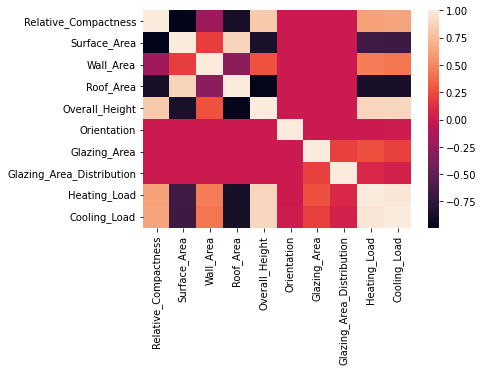

In [7]:
sns.heatmap(df.corr()) # heatmap for ploting

**Correlation of Independent Variables with the Dependent Variable**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


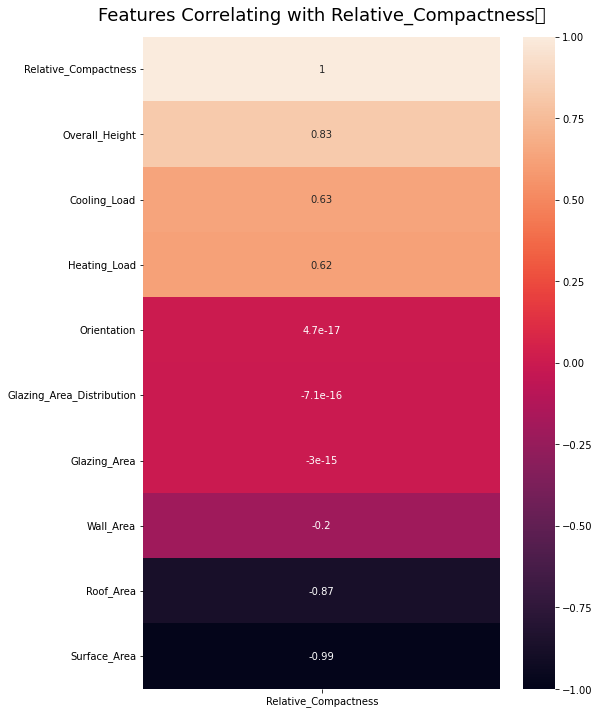

In [8]:
plt.figure(figsize=(8, 12)) # for ploting size
heatmap = sns.heatmap(df.corr()[['Relative_Compactness']].sort_values(by='Relative_Compactness', ascending=False), vmin=-1, vmax=1, annot=True, ) # sort by Relative_Compactness
heatmap.set_title('Features Correlating with Relative_Compactness	', fontdict={'fontsize':18}, pad=16);

**Check missing value**

In [9]:
df.isnull().sum() # check missing value which is necessery for model making

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

**Data Set describtion**

In [10]:
df.describe() # check Data Set describtion  which is also necessery for model making

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**MODELLING**

In [11]:
X = df.drop(['Heating_Load','Cooling_Load'],axis=1) # here i copy data of two column and assign into y1 & y2
y1 = df['Heating_Load']
y2 = df['Cooling_Load']

**Train split**

In [12]:
from sklearn.model_selection import train_test_split # import for data set spit 
train_X, test_X, train_y, test_y = train_test_split(X, y1,test_size = 0.2, random_state = 123)# Separate the data into a training set and a test set (20%)

**HEATING LOAD PREDICTION**

In [13]:
HEATING_LOAD_MODELS = [] # list for heating 
HEATING_LOAD_SCORES = [] # list for score

**Random forest**

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X, y1, cv=5)
print(np.mean(scores))
HEATING_LOAD_MODELS.append('Random Forest')
HEATING_LOAD_SCORES.append(np.mean(scores))

0.965026402959408


**k-nearest neighbor**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # n_neighbors is 7 as per requrment b/w 2 to 5 
scoresknn = cross_val_score(knn, X, y1, cv=3)
print(np.mean(scoresknn))
HEATING_LOAD_MODELS.append('Knn')
HEATING_LOAD_SCORES.append(np.mean(scoresknn))

0.8959998065556167


**Support Vector Machine**

In [16]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
scoressvm = cross_val_score(clf, X, y1, cv=2)
print(np.mean(scoressvm))
HEATING_LOAD_MODELS.append('Svm')
HEATING_LOAD_SCORES.append(np.mean(scoressvm))

0.9012381677129342


**COOLING LOAD PREDICTION**

In [17]:
COOLING_LOAD_MODELS = [] # list for cooling 
COOLING_LOAD_SCORES = [] # list for scores 

**Random forest**

In [18]:
from sklearn.model_selection import cross_val_score # import cross validation
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X, y2, cv=5)
print(np.mean(scores))
COOLING_LOAD_MODELS.append('Random Forest')
COOLING_LOAD_SCORES.append(np.mean(scores))

0.9580336454942622


**k-nearest neighbor**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # n_neighbors is 7 as per requrment b/w 2 to 5 
scoresknn = cross_val_score(knn, X, y1, cv=3)
print(np.mean(scoresknn))
COOLING_LOAD_MODELS.append('Knn')
COOLING_LOAD_SCORES.append(np.mean(scoresknn))

0.8959262979138605


**Support Vector Machine**

In [19]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
scoressvm = cross_val_score(clf, X, y1, cv=2)
print(np.mean(scoressvm))
COOLING_LOAD_MODELS.append('Svm')
COOLING_LOAD_SCORES.append(np.mean(scoressvm))

0.9012969701444479


**SCORES**

**HEATING LOAD PREDICTION SCORE**

In [20]:
from tabulate import tabulate # for show table form
table = [['Model','Score']]
for i in range(len(HEATING_LOAD_MODELS)):
    table.append([HEATING_LOAD_MODELS[i],HEATING_LOAD_SCORES[i]])
print('HEATING LOAD PREDICTION SCORE')
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

HEATING LOAD PREDICTION SCORE
╒═══════════════╤══════════╕
│ Model         │    Score │
╞═══════════════╪══════════╡
│ Random Forest │ 0.965026 │
├───────────────┼──────────┤
│ Knn           │ 0.896    │
├───────────────┼──────────┤
│ Svm           │ 0.901238 │
╘═══════════════╧══════════╛


**Cooling LOAD PREDICTION SCORE**

In [23]:
from tabulate import tabulate # for show table form
table = [['Model','Score']]
for i in range(len(COOLING_LOAD_MODELS)):
    table.append([COOLING_LOAD_MODELS[i],COOLING_LOAD_SCORES[i]])
print('Cooling LOAD PREDICTION SCORE')
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

Cooling LOAD PREDICTION SCORE
╒═══════════════╤══════════╕
│ Model         │    Score │
╞═══════════════╪══════════╡
│ Random Forest │ 0.958034 │
├───────────────┼──────────┤
│ Svm           │ 0.901297 │
├───────────────┼──────────┤
│ Knn           │ 0.895926 │
╘═══════════════╧══════════╛
